In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from sklearn.model_selection import cross_val_score
from collections import Counter
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

# 1
I read it. 

# 2
*Social learning* denotes the process by which agents (people) update their beliefs and preferences based on the observations of others actions and outcomes. In this case, knowing that a lot of other people have watched a movie might make someone more likely to also watch that movie, even if other metrics of the movie (like the plot, the cost, the runtime, etc.) are not known or equal between movies. On the other hand, *social utility* is the utility that an agent derives from the actions of others. For example, a movie that has received critical acclamation might be more valuable to watch, because of some social utility that is derived from way the movie comments on society, or the way it is perceived by others.

# 3
I'm going to assume that we still cannot measure social utility or individual utility directly, so we are going to use a proxy for utility. 

Consider a setup where one groups of people are given some money and asked to place some fraction in a social pool and some fraction in an individual pool. The money in the social pool is then distributed equally among all members of the group, while the money in the individual pool is kept by the individual. There is some multiplier on the social pool greater than one, such placing money into the social pool make it more valuable than placing it in the individual pool. This multiplier serves as a proxy for the extra utility derived from social interactions such as road building or community events that cannot be achieved by individuals alone. 

In one random group, the members are able to observe the actions of other members, meaning that they can see if other people are placing money in the social pool or the individual pool. In another random group, the members are not able to observe the actions of other members. In this case, we can directly measure social utility as the sum of all the money: that is the money in the social pool times the multiplier plus the total amount of money in the individual pools. Moreover, we can directly measure the affects of social learning as we can compare a setting in which people can observe and *learn* from others to a setting in which they cannot.

# 4
No, this is not a causal relationship. First off, there is really no reason why this should be a causal relationship unless one just assumes network effects. It is very easy to think of confounding variables. For example, maybe one film was released nationally and one was released regionally. A regional versus a local release could easily affect the number of people who watched the movie simultaneously in both the earlier and the later weeks. A second confounding variable could be the genre or quality of the movie. A good movie in a desirable genre could just attract more viewers without benefiting from any network effects. For example, the same people could watch the movie over and over again. 

Moreover, there is a lot that can happen that does not involve the number of people to watch a movie in a specific week that could boost or alter viewership. For example, a very popular movie might have a scandal that causes people to stop watching it. An initially popular movie could be superseded by a new movie that is even more popular. A very unpopular movie might be boosted by a random tweet from a celebrity. In any case, just assuming a regression on the number of people who watched a movie in a specific week is going to be a very poor model without controlling for a lot of other factors.

# 5
One way to control for those factors might be something like a social media sentiment score. I know this is a bit nebulous, but you can use LLMs (and simpler metrics, like the number of tweets that contain the strings {Movie Title} and {awesome!/good/bad/ etc.} )to gauge reception on a platform like twitter. This provides a extra data-point that can be controlled for in a regression. This might account for factors like critical reception, political discourse, and celebrity praise. Moreover, this sentiment score can be updated weekly, so if something happens outside of just the number of people who watched a movie, we can still account for it.

# 6
Yes, if Sands and Gilchrist were able to control for all confounding variables and assume CIA then they would be able to make stronger claims around the causal effects of more movie watchers in a specific week on the number of people who watched the movie in the next week. However, I think that this is a very strong assumption to make. I think that there are a lot of factors that could affect the number of people who watched a movie in a specific week that are not accounted for in the model they present in the paper. So, I agree in the abstract that if one can observe and control confounding variable then one can make strong causal claims, but I think that this is a very difficult thing to do in practice.

In terms of disambiguating between social utility and learning, controlling for these effects would provide insight into telling these effects apart. This is because some of these confounding variables are related to social learning and some are related to social utility. For example, we might expect that a movie that has a very high social media sentiment score might have increased social utility (for example, one might argue that a movie like *Star Wars* is a socially useful movie and the high number of viewers is an effect of the social utility of the movie, not a learned social behavior). Part of the problem here is that depending on how wants to define social utility, one might argue that anything that a lot of people are doing is socially useful as it builds culture and community. I understand that there might be a more technical definition based on specific metrics, but given that utility is a very nebulous concept, I think in general it is very difficult to disambiguate between social utility and learning unless one places very precise bounds on what one means by utility. Given in this question that we are able to control for all confounding variables, it is probably possible given adequate, precision in definitions, but in practice I think it is very difficult to do.

# 7
1. Social learning suggests that agents learn from the actions of others, and in particular, that they update their beliefs and preferences based on the observations of others actions and outcomes. Therefore, if a lot of people watch a movie that is very bad and this feedback is well-known, then one might expect that fewer people would watch the movie in the future. On the other hand, social utility suggests that agents derive utility from the actions of others. Therefore, if a lot of people watch a movie that is very bad and this feedback is well-known, then one might expect that more people would watch the movie in the future. This is because the social utility of the movie is high due to shared experience of watching the film, even if it is not good. Therefore, we should be able to find examples of movies that are very bad that see a precipitous drop in viewership if social learning is the dominant effect, and we should be able to find examples of movies that are very bad that see sustained or increasing viewership if social utility is the dominant effect.

2. We also need to test for the precision of information. If social learning is dominant, then we should expect precise information to drive viewership more than imprecise information. This is because precise information is more likely to be accurate and therefore more likely to be useful. For example, this might include looking at examples where a movie is released at a film festival before being released nationally. This is "a lot of information" to give about a movie to critics. So, if people know that a movie has been vetted by critics with precise information, and social learning holds, then we would expect people to be particularly responsive to their information. If social learning is not a dominant effect, then we would expect that people would be less responsive to precise information--that is to say, the information from a film festival would not alter behavior as compared to a movie that only has a trailer.

# 8
I will quote from the paper: 

"We proxy for realized movie quality with ratings by expert reviewers.
The ratings come from IMDb’s top 1,000 voters, a group characterized
by IMDb as “the 1000 people who have voted for the most titles in [their] ratings poll.”

I am not particularly familiar with the quality of these reviewers per se (are they biased in some obvious way against some genres, release dates, etc?), however, I do think that this is probably about as good of a proxy as is easily obtainable. It would be better if all reviewers were not IMDb reviewers in order to control for any sources of error specific into our metric. 


For the precision of information, Sands and Gilchrist used production budget as a proximal metric. I am much more skeptical about the utility of this metric. They are basing this on the idea that a higher production budget implies a higher advertising budget which implies greater precision of information. On the surface, this connection makes sense as a blockbuster like Star Wars advertizes a lot more than a smaller indie film. However, there are a lot of assumptions that go into this proxy. To me, the important one is that "precision of information" is a somewhat ill-defined term. Advertisements need not reveal much about the movie, but sometimes something like the name can reveal quite a bit. Take for example "The Theory of Everything" and "Oppenheimer." Most people generally know what Oppenheimer is going to be about without having to see a trailer. On the other hand, "The Theory of Everything," despite being another movie about a famous scientist, needs trailers to reveal the plot. Therefore, I do not think you can draw a straight line between production budget and precision of information.

# 9
I will again quote from the paper: 

"That is not to say, however, that the observed relationship is causal. As Einav (2007) demonstrates, the seasonality of viewership is driven by seasonality both in underlying demand and, since the supply side takes into account expected demand in timing releases, in the number and quality of movies available in theaters."

That is to say that a potential causal relationship is complicated by the manner in which the supply side chooses to release movies. They understand (some) of these seasonal effects, and so they act to use them to their advantage. This is a confounding variable that prevents us from making a causal claim.

# 10
The regression is not saturated because there some potential parameters that are not included in the model. For example, there are not interaction terms between these variables. It seems likely that Gilchrist and Sands would not want to saturate their model for several reasons. Crucially, they are likely trying to avoid over fitting and want to keep the model simple and easy to interpret. 

The advantage of saturation is that it can account for many effects and be very accurate. Specifically, due to the interoperability of linear regressions, this also means that we can easily understand the effects of many variables on the outcome. However, the disadvantage is that there is a huge risk of overfitting and just fitting to noise. As the hint suggests, each holiday only occurs once a year. So, if you had a dummy variable for each holiday, you would have very little data per parameter. This would make the model very noisy and likely to overfit. I think trying to keep their model robust was likely the motivation for not saturating the model.

# 11
## A

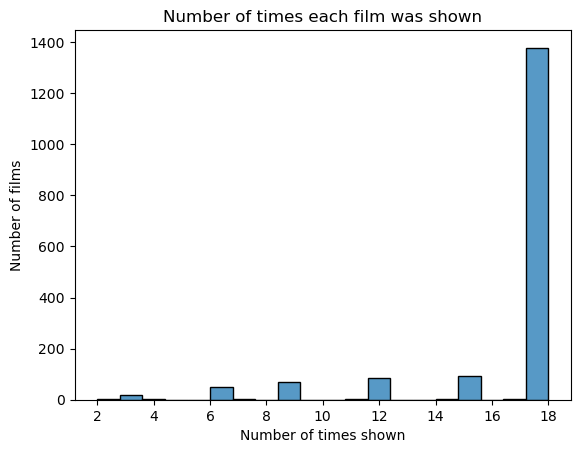

In [52]:
films_day = pd.read_stata('films_day.dta')

# plot number of times each film was shown by title using histogram and sns - MV
film_counts = films_day['title'].value_counts()
sns.histplot(film_counts, bins=20)

# add labels and title
plt.xlabel('Number of times shown')
plt.ylabel('Number of films')
plt.title('Number of times each film was shown')
plt.show()

### B

In [53]:
print(len(films_day['title'].unique()))
films_day = films_day[films_day['dropped']== 0]
print(len(films_day['title'].unique()))

1698
1381


### C

In [54]:
print(f"{films_day.iloc[0, :].title} has smallest date value {films_day[films_day['title'] == films_day.iloc[0, :].title].date.min()} and was released on July 17, 2009")
print(f"{films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min()} days before July 17, 2009 is {(pd.to_datetime('2009-07-17') - pd.Timedelta(days=films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min())).date()}")
reference_date = (pd.to_datetime('2009-07-17') - pd.Timedelta(days=films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min())).date()

(500) Days of Summer has smallest date value 18116 and was released on July 17, 2009
18116 days before July 17, 2009 is 1959-12-11


### D

In [55]:
reference_date = pd.to_datetime(reference_date)

# Apply a function to calculate new date for each film
films_day['new_date'] = films_day['date'].apply(lambda x: (reference_date + pd.Timedelta(days=x) - pd.Timedelta(days=1)))

films_day['sat_date'] = films_day['sat_date'].apply(lambda x: (reference_date + pd.Timedelta(days=x) - pd.Timedelta(days=1)))

films_day['new_date']

0       2009-07-17
1       2009-03-06
2       2010-11-04
3       2004-04-03
4       2007-06-02
           ...    
28245   2002-09-07
28246   2002-09-05
28247   2002-09-12
28248   2002-09-13
28249   2002-09-14
Name: new_date, Length: 24855, dtype: datetime64[ns]

### E

In [56]:
# dummy for friday, saturday, and sunday
films_day['friday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 4 else 0)
films_day['saturday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 5 else 0)
films_day['sunday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 6 else 0)

### F

In [57]:
# create dummies for each week of the year
films_day['week'] = films_day['new_date'].apply(lambda x: x.weekofyear)
films_day['week'] = films_day['week'].astype('category')
films_day = pd.get_dummies(films_day, columns=['week'], drop_first=True)

### G

In [58]:
# create dummies for each year 
films_day['year'] = films_day['new_date'].apply(lambda x: x.year)
films_day['year'] = films_day['year'].astype('category')
films_day = pd.get_dummies(films_day, columns=['year'], drop_first=True)


### H

In [59]:
# reate a plot where on the x-axis, you have the time since a movie was introduced 
# (week and days) and on the y-axis, you have the number of tickets in that week, averaged across movies.

# I might be stupid, but this is probably the fastest way to do this?? - MV 
release_date_dict = {}
for row in range(films_day.shape[0]):
    title = films_day.iloc[row, :]['title']
    date = films_day.iloc[row, :]['new_date']
    if title not in release_date_dict.keys():
        release_date_dict[title] = date
    else:
        if date < release_date_dict[title]:
            release_date_dict[title] = date
    
# put the release date in each row
films_day['release_date'] = films_day['title'].apply(lambda x: release_date_dict[x])

films_day['days_since_release'] = films_day['new_date'] - films_day['release_date']
films_day['weeks_since_release'] = films_day['days_since_release'].apply(lambda x: x.days//7)

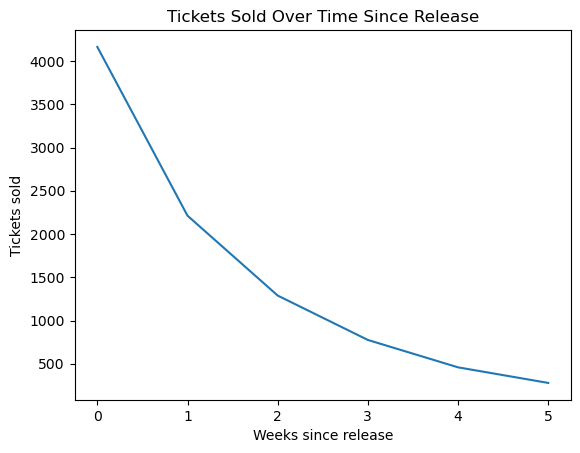

In [60]:
# group by weeks since release and sum the tickets
films_day_grouped = films_day.groupby('weeks_since_release')['tickets'].sum()

# plot the tickets by weeks since release
plt.plot(films_day_grouped)
plt.xlabel('Weeks since release')
plt.ylabel('Tickets sold')
plt.title('Tickets Sold Over Time Since Release')
plt.show()

# 12
Gilchrist and Sands propose using weather shocks as an instrumental variable. 

They argue for exogeneity by asking if the weather is correlated with expected demand and if there is a correlation with quality. In both cases, they essentially just compute correlations and find very little or no correlation. This makes sense since movie releases are planned well in advance and are not likely to be affected by weather.

They argue for exclusion on the grounds that the weather does not affect a person's feelings about the movie. Moreover, they argue that any affect of weather will be localized to that initial shock and will not affect future viewership. Thus, the only affect on future viewership will be through the number of people who watched the movie in the initial week.

They argue for relevance on the grounds that weather shocks will affect the number of people who watch a movie in a specific week. This is because people, according to the paper, people are more likely to go to the movies when it is raining, but would rather be outside when it is sunny. Thus, these weather shocks are relevant to the number of people who watch a movie in a specific week.

# 13

In [61]:
# extract dummy from column names
holiday_dummies = [col for col in films_day.columns if 'hh' in col]
week_dummies = [col for col in films_day.columns if 'week' in col]
year_dummies = [col for col in films_day.columns if 'year' in col]

dummy_columns = holiday_dummies + week_dummies + year_dummies

films_day_modified = films_day[films_day['weeks_since_release'] == 0]

# create modified dataframe
films_day_modified = films_day_modified[['tickets', 'weeks_since_release', 'friday', 'saturday', 'sunday'] + dummy_columns]

# Create the model using the filtered dataframe
X_opening = films_day_modified.drop('tickets', axis=1)
y_opening = films_day_modified['tickets']
X_opening = sm.add_constant(X_opening)
model_opening = sm.OLS(y_opening, X_opening).fit()
print(model_opening.summary())

                            OLS Regression Results                            
Dep. Variable:                tickets   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     14.23
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.21e-173
Time:                        21:11:44   Log-Likelihood:                -5672.7
No. Observations:                4143   AIC:                         1.152e+04
Df Residuals:                    4055   BIC:                         1.208e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8996    

In [62]:
# create abnormal viewership variable
films_day['abnormal_viewership_week_1'] = films_day['tickets'] - model_opening.predict(X_opening)

# 14

In [63]:
weather_all = pd.read_stata('weather_collapsed_all.dta')
weather_all = weather_all.rename(columns=lambda x: 'www_' + x if x != 'sat_date' else x)

weather_all['sat_date'] = pd.to_datetime(weather_all['sat_date'])
films_day['sat_date'] = pd.to_datetime(films_day['sat_date'])
# make films_day sat_date to two days before
films_day['sat_date'] = films_day['sat_date'] + pd.Timedelta(days=1)
films_day['sat_date'] = films_day['sat_date'].dt.normalize()
weather_all['sat_date'] = weather_all['sat_date'].dt.normalize()

# Debugging: Check for matching 'sat_date' values before merge
print("Unique dates in films_day:", films_day['sat_date'].nunique())
print("Unique dates in weather_all:", weather_all['sat_date'].nunique())
print("Common dates:", films_day['sat_date'].isin(weather_all['sat_date']).sum())

film_weather = pd.merge(films_day, weather_all, on='sat_date', how='left')

film_weather.head()

Unique dates in films_day: 572
Unique dates in weather_all: 1644
Common dates: 24855


,title,production_budget,release_yr,p33_highbudget,p33_lowbudget,p33_hv1000,p33_lv1000,date,hhmlk,hhpres,...,www_cloud_1_6,www_cloud_2_6,www_cloud_3_6,www_cloud_4_6,www_cloud_5_6,www_cloud_6_6,www_cloud_7_6,www_cloud_8_6,www_mat_la_6,www_mat_la_cens_6
0,(500) Days of Summer,7500000.0,2009,NaN,1.0,1.0,NaN,18117,0,0,...,0.122288,0.111988,0.147052,0.067938,0.130835,0.153627,0.092483,0.033750,158.278107,158.278107
1,12 Rounds,20000000.0,2009,NaN,1.0,NaN,1.0,17984,0,0,...,0.135937,0.122191,0.105826,0.094261,0.120009,0.061968,0.110844,0.083133,388.818673,60.971851
2,127 Hours,18000000.0,2010,NaN,1.0,1.0,NaN,18592,0,0,...,0.107072,0.086363,0.111919,0.140780,0.063891,0.035030,0.037233,0.050011,423.804141,195.154659
3,13 Going on 30,37000000.0,2004,NaN,NaN,NaN,NaN,16186,0,0,...,0.115680,0.092885,0.059651,0.076907,0.072433,0.098637,0.124840,0.163826,317.056881,178.419045
4,1408,25000000.0,2007,NaN,NaN,1.0,NaN,17341,0,0,...,0.119359,0.137916,0.113665,0.129903,0.125896,0.091523,0.067271,0.073809,111.566637,111.566637


# 15

In [64]:
X = film_weather[dummy_columns]

residuals = {}
weather_variables = []
for col in weather_all.columns:
    if col.startswith('www_'):
        weather_variables.append(col)
        y = film_weather[col]
        model = sm.OLS(y, X, missing='drop').fit()
 
        residuals[col + '_res'] = model.resid

residuals_df = pd.DataFrame(residuals)

residuals_df.index = film_weather.index

film_weather = pd.concat([film_weather, residuals_df], axis=1)

# 16

In [65]:
# Filter data for Week 2 viewership
films_week_2 = film_weather[film_weather['weeks_since_release'] == 1]

X_week_2 = films_week_2[dummy_columns] 
y_week_2 = films_week_2['tickets']  

X_week_2 = sm.add_constant(X_week_2)

model_week_2 = sm.OLS(y_week_2, X_week_2, missing='drop').fit()

# Calculate abnormal viewership for Week 2 by subtracting predicted from actual viewership
films_week_2['abnormal_viewership_week_2'] = y_week_2 - model_week_2.predict(X_week_2)


/var/folders/mb/6qcb8p7j0yz1_bmv1h2vfy_80000gn/T/ipykernel_38335/1225801638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_week_2['abnormal_viewership_week_2'] = y_week_2 - model_week_2.predict(X_week_2)


In [66]:
# make dict of week_2 ticket sales
week_2 = film_weather[film_weather['week_2'] == 1]
week_2_dict = {}
for index, row in week_2.iterrows():
    week_2_dict[row['title']] = row['tickets']
film_weather['week_2_ticket'] = film_weather['title'].map(week_2_dict)

In [67]:
# Ensure 'film_weather_filtered' is treated as a separate DataFrame, not a view
film_weather_filtered = film_weather.dropna(subset=['week_2_ticket']).copy()

X_filtered = film_weather_filtered[dummy_columns]
y_filtered = film_weather_filtered['week_2_ticket']
X_filtered = sm.add_constant(X_filtered)  # Ensure this line is here if you haven't added a constant yet
model_filtered = sm.OLS(y_filtered, X_filtered, missing='drop').fit()

film_weather_filtered.loc[:, 'abnormal_viewership_week_2'] = model_filtered.resid

film_weather = pd.merge(film_weather, film_weather_filtered[['title', 'abnormal_viewership_week_2']], on='title', how='left')

# 17

## A

In [68]:
film_weather_cleaned = film_weather.dropna(subset=['abnormal_viewership_week_1'])

X = film_weather_cleaned[[col for col in film_weather.columns if col.startswith('www_') and col.endswith('_res')]]  # Predictor variables
y = film_weather_cleaned['abnormal_viewership_week_1'] 

# Perform the OLS regression
ols_model = sm.OLS(y, X, missing='drop').fit()

# Display the regression results
print(ols_model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     abnormal_viewership_week_1   R-squared (uncentered):                   0.096
Model:                                    OLS   Adj. R-squared (uncentered):              0.088
Method:                         Least Squares   F-statistic:                              11.85
Date:                        Wed, 28 Feb 2024   Prob (F-statistic):                   9.47e-183
Time:                                21:11:59   Log-Likelihood:                         -11106.
No. Observations:                       11844   AIC:                                  2.242e+04
Df Residuals:                           11739   BIC:                                  2.320e+04
Df Model:                                 105                                                  
Covariance Type:                    nonrobust                                                  
                            coef    std 

# B

In [ ]:
film_weather_cleaned = film_weather.dropna(subset=['abnormal_viewership_week_1'])

X = film_weather_cleaned[[col for col in film_weather.columns if col.startswith('www_') and col.endswith('_res')]]  # Predictor variables
y = film_weather_cleaned['abnormal_viewership_week_1'] 

lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',  
          forward=True, 
          floating=False,
          scoring='r2',
          verbose=2,  # Enables progress bar
          cv=0,  
          n_jobs=-1)  # Use all available CPU cores for parallel processing

# Fit the model
sfs_forward = sfs.fit(X, y)

# Get the selected feature names
selected_features_forward = X.columns[list(sfs_forward.k_feature_idx_)]

print("Selected features:", selected_features_forward)


## C

In [ ]:
film_weather_cleaned = film_weather.dropna(subset=['abnormal_viewership_week_1'])

X = film_weather_cleaned[[col for col in film_weather.columns if col.startswith('www_') and col.endswith('_res')]]  # Predictor variables
y = film_weather_cleaned['abnormal_viewership_week_1']  

lr = LinearRegression()

sfs = SFS(lr,
          k_features='best', 
          forward=False,  # Specifies forward selection
          floating=False,
          scoring='r2',
          verbose=2, 
          cv=0,  # No cross-validation; adjust as needed for your analysis
          n_jobs=-1)  # Use all available CPU cores for parallel processing

sfs = sfs.fit(X, y)

selected_features = X.columns[list(sfs.k_feature_idx_)]

print("Selected features:", selected_features)

## D
### (i)

In [69]:
# Define alphas to explore for RidgeCV
alphas = np.logspace(-6, 6, 200)

# Initialize RidgeCV with 5-fold cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')

# Fit the model
ridge_cv.fit(X, y)

# Optimal lambda selected by cross-validation
optimal_lambda = ridge_cv.alpha_
print(f"Optimal λ chosen by 5-fold CV: {optimal_lambda}")


Optimal λ chosen by 5-fold CV: 26.126752255633264


### (ii)


In [70]:
mean_scores = []
std_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

mean_scores = np.array(mean_scores) * -1
std_scores = np.array(std_scores)

min_index = np.argmin(mean_scores)
target_score = mean_scores[min_index] + std_scores[min_index]

lambda_within_1_std_ridge = max([alpha for i, alpha in enumerate(alphas) if mean_scores[i] <= target_score])
print(f"Highest λ within 1 std dev of minimum CV error: {lambda_within_1_std_ridge}")

Highest λ within 1 std dev of minimum CV error: 1000000.0


## E
### (i)

In [71]:
# LASSO Chosen with 5-fold cross validation
lasso_cv = LassoCV(cv=5)

# Fit the model
lasso_cv.fit(X, y)

# Print model details
print(f"Optimal λ chosen by 5-fold CV: {lasso_cv.alpha_}")

# Extract the coefficients
lasso_coefs = lasso_cv.coef_

# Extract the selected features
selected_features = X.columns[lasso_coefs != 0]
print("Selected features:", selected_features)

Optimal λ chosen by 5-fold CV: 3.414017951854326
Selected features: Index(['www_mat_la_0_res'], dtype='object')


### (ii)

In [72]:
final_error_index = np.argmin(np.mean(lasso_cv.mse_path_, axis=1))
final_error = np.mean(lasso_cv.mse_path_[final_error_index])

# Get the standard deviation of the error for the optimal alpha
std_error = np.std(lasso_cv.mse_path_[final_error_index], axis=0)

# Calculate the upper bound for the error
upper_bound = final_error + std_error

# Find the highest lambda (alpha) within 1 standard deviation of the minimum CV error
acceptable_errors_indices = np.where(np.mean(lasso_cv.mse_path_, axis=1) <= upper_bound)[0]
acceptable_alphas = lasso_cv.alphas_[acceptable_errors_indices]
lambda_within_1_std = max(acceptable_alphas)

print(f"Highest λ within 1 std dev of minimum CV error: {lambda_within_1_std}")


Highest λ within 1 std dev of minimum CV error: 9.067931372680944


### (iii), (iv), (v)

In [73]:

alphas_to_test = lasso_cv.alphas_

smallest_alphas = {}

for alpha in alphas_to_test:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    non_zero_coefs = np.sum(lasso.coef_ != 0)
    
    if non_zero_coefs in [1, 2, 3] and non_zero_coefs not in smallest_alphas:
        smallest_alphas[non_zero_coefs] = alpha

    if len(smallest_alphas) == 3:
        break

# Print the results
for num_coefs, alpha in smallest_alphas.items():
    print(f"Smallest λ for {num_coefs} included regressor(s): {alpha}")

Smallest λ for 1 included regressor(s): 9.067931372680944
Smallest λ for 2 included regressor(s): 2.0948097582346112
Smallest λ for 3 included regressor(s): 0.5189003722423665


## F

        OLS  Ridge_optimal  Ridge_within_1_std     LASSO  LASSO_within_1_std  \
0 -0.757389      -0.830732           -0.846918 -0.846522           -0.851116   
1 -0.818833      -0.637278           -0.689389 -0.762659           -0.777228   
2 -1.700033      -1.395071           -1.232040 -1.259594           -1.261673   
3 -0.012310      -0.088690            0.058412  0.117871            0.121967   
4 -0.117499      -0.184346           -0.249965 -0.252416           -0.258046   

   LASSO_1_included  LASSO_2_included  LASSO_3_included  
0         -0.851116         -0.845452         -0.844180  
1         -0.777228         -0.758694         -0.747010  
2         -1.261673         -1.258223         -1.245989  
3          0.121967          0.115367          0.093727  
4         -0.258046         -0.251031         -0.248519  
(11844, 8)


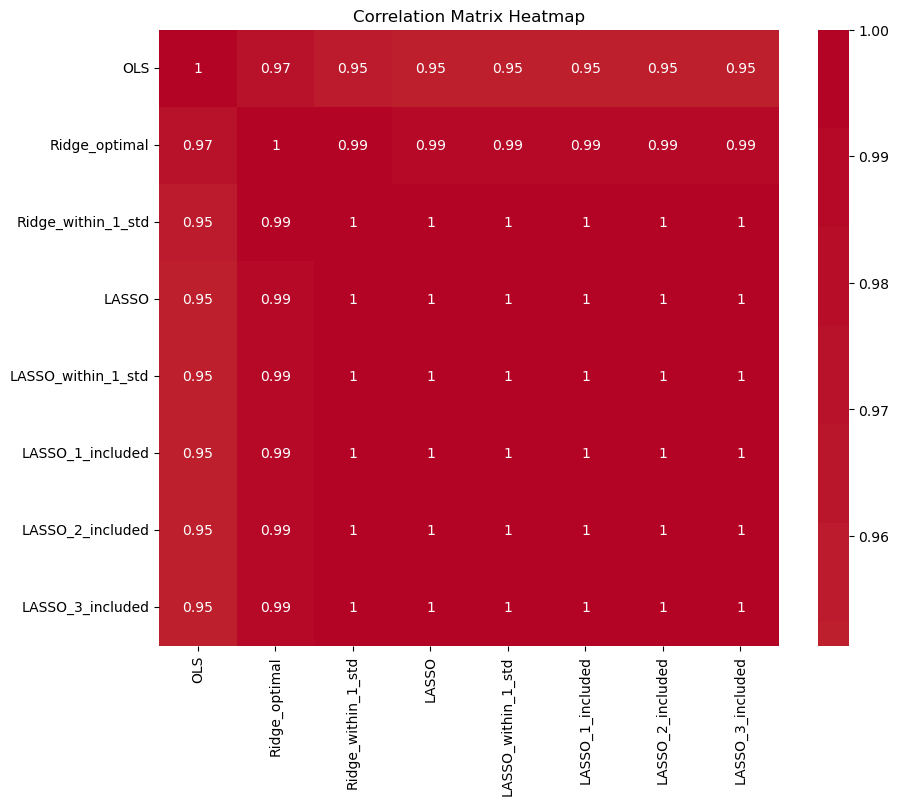

In [74]:
y_week_1 = y.copy()

# we will construct the table of results for each model
abnormal_viewership_df = pd.DataFrame()
# OLS
abnormal_viewership_df['OLS'] = y - ols_model.predict(X)

# Ridge - Optimal
ridge = Ridge(alpha=optimal_lambda)
ridge.fit(X, y)
abnormal_viewership_df['Ridge_optimal'] = y - ridge.predict(X)

# Ridge - Within 1 std
ridge_within_1_std = Ridge(alpha=lambda_within_1_std_ridge)
ridge_within_1_std.fit(X, y)
abnormal_viewership_df['Ridge_within_1_std'] = y - ridge_within_1_std.predict(X)

# LASSO
abnormal_viewership_df['LASSO'] = y - lasso_cv.predict(X)

# LASSO - Within 1 std
lasso_within_1_std = Lasso(alpha=lambda_within_1_std)
lasso_within_1_std.fit(X, y)
abnormal_viewership_df['LASSO_within_1_std'] = y - lasso_within_1_std.predict(X)

# LASSO 3 lambda values 
for coef, alpha in smallest_alphas.items():
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    abnormal_viewership_df[f'LASSO_{coef}_included'] = y - lasso.predict(X)

# Display the first few rows of the DataFrame
print(abnormal_viewership_df.head())
print(abnormal_viewership_df.shape)



# Plot correlation matrix heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(abnormal_viewership_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [75]:
# How many regressors included in each model?
number_of_regressors = {}
number_of_regressors['OLS'] = len(ols_model.params)
number_of_regressors['Ridge_optimal'] = np.sum(ridge.coef_ != 0)
number_of_regressors['Ridge_within_1_std'] = np.sum(ridge_within_1_std.coef_ != 0)
number_of_regressors['LASSO'] = np.sum(lasso_coefs != 0)
number_of_regressors['LASSO_within_1_std'] = np.sum(lasso_within_1_std.coef_ != 0)
for coef, alpha in smallest_alphas.items():
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    number_of_regressors[f'LASSO_{coef}_included'] = np.sum(lasso.coef_ != 0)

# Convert the dictionary to a DataFrame
number_of_regressors_df = pd.DataFrame(number_of_regressors, index=[0])

# Display the DataFrame
number_of_regressors_df

,OLS,Ridge_optimal,Ridge_within_1_std,LASSO,LASSO_within_1_std,LASSO_1_included,LASSO_2_included,LASSO_3_included
0,111,111,111,1,1,1,2,3


# 18

In [77]:
# ow regress abnormal viewership in week 2 on the fitted values of the first stage regression for abnormal viewership in week 1 on weather 
# for each of the methods considered above and report the coefficient on abnormal viewership in week 1. Also report the 
# coefficient of regressing abnormal viewership in week 2 on abnormal viewership in week 1 (no instruments).

film_weather['abnormal_viewership_week_2'] = films_week_2['abnormal_viewership_week_2']
film_weather_cleaned = film_weather.dropna(subset=['abnormal_viewership_week_2'])

X = film_weather_cleaned[[col for col in film_weather.columns if col.startswith('www_') and col.endswith('_res')]] # Predictor variables
X = sm.add_constant(X)
y = film_weather_cleaned['abnormal_viewership_week_2']
# Resetting index for the dependent variable
y = y.reset_index(drop=True)

y_week_2 = y.copy()

# Resetting index for the independent variables (residuals) before using them in regressions
abnormal_viewership_df['OLS'] = abnormal_viewership_df['OLS'].reset_index(drop=True)
abnormal_viewership_df['Ridge_optimal'] = abnormal_viewership_df['Ridge_optimal'].reset_index(drop=True)
abnormal_viewership_df['Ridge_within_1_std'] = abnormal_viewership_df['Ridge_within_1_std'].reset_index(drop=True)
abnormal_viewership_df['LASSO'] = abnormal_viewership_df['LASSO'].reset_index(drop=True)
abnormal_viewership_df['LASSO_within_1_std'] = abnormal_viewership_df['LASSO_within_1_std'].reset_index(drop=True)

# For LASSO models with varying lambda values, reset each one if they're in separate columns
for coef in smallest_alphas.keys():
    abnormal_viewership_df[f'LASSO_{coef}_included'] = abnormal_viewership_df[f'LASSO_{coef}_included'].reset_index(drop=True)
# Remove rows with NaNs in your DataFrame
abnormal_viewership_df = abnormal_viewership_df.replace([np.inf, -np.inf], np.nan).dropna()
y = y[abnormal_viewership_df.index]  # Ensure y is aligned with the cleaned DataFrame

# You might need to reset indices again if they become misaligned after dropping
abnormal_viewership_df = abnormal_viewership_df.reset_index(drop=True)
y = y.reset_index(drop=True)

# Now proceed with the regression
ols_x = sm.add_constant(abnormal_viewership_df['OLS'])  # Ensure you're adding a constant term for OLS
ols_model = sm.OLS(y, ols_x).fit()

# Ridge - Optimal
ridge = Ridge(alpha=optimal_lambda)
ridge.fit(abnormal_viewership_df['Ridge_optimal'].values.reshape(-1, 1), y)
ridge_coef = ridge.coef_

# Ridge - Within 1 std
ridge_within_1_std = Ridge(alpha=lambda_within_1_std_ridge)
ridge_within_1_std.fit(abnormal_viewership_df['Ridge_within_1_std'].values.reshape(-1, 1), y)
ridge_within_1_std_coef = ridge_within_1_std.coef_

# LASSO
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(abnormal_viewership_df['LASSO'].values.reshape(-1, 1), y)
lasso_coef = lasso.coef_

# LASSO - Within 1 std
lasso_within_1_std = Lasso(alpha=lambda_within_1_std)
lasso_within_1_std.fit(abnormal_viewership_df['LASSO_within_1_std'].values.reshape(-1, 1), y)
lasso_within_1_std_coef = lasso_within_1_std.coef_

# LASSO 3 lambda values
lasso_3_coef = {}
for coef, alpha in smallest_alphas.items():
    lasso = Lasso(alpha=alpha)
    lasso.fit(abnormal_viewership_df[f'LASSO_{coef}_included'].values.reshape(-1, 1), y)
    lasso_3_coef[coef] = lasso.coef_

# Make DF of the coefficients on abnormal viewership in week 1
coefficients = {'OLS': ols_model.params[0],
               'Ridge_optimal': ridge_coef[0],
               'Ridge_within_1_std': ridge_within_1_std_coef[0],
               'LASSO': lasso_coef[0],
               'LASSO_within_1_std': lasso_within_1_std_coef[0]}
for coef, alpha in smallest_alphas.items():
    coefficients[f'LASSO_{coef}_included'] = lasso_3_coef[coef][0]

coefficients_df = pd.DataFrame(coefficients, index=[0])

coefficients_df


,OLS,Ridge_optimal,Ridge_within_1_std,LASSO,LASSO_within_1_std,LASSO_1_included,LASSO_2_included,LASSO_3_included
0,-0.000883,-0.031505,-0.000038,-0.0,-0.0,-0.0,-0.0,-0.0


In [80]:
# we need to re-separate our data to ensure that the indices are aligned
films_week_1 = film_weather[film_weather['weeks_since_release'] == 0]
films_week_2 = film_weather[film_weather['weeks_since_release'] == 1]

# find y_week_2
y_week_2 = films_week_2['tickets']

# find y_week_1
y_week_1 = films_week_1['tickets']

# align indices
y_week_1 = y_week_1.reset_index(drop=True)
y_week_2 = y_week_2.reset_index(drop=True)

# Direct regression of week 2 viewership on week 1 viewership
direct_model = sm.OLS(y_week_2, sm.add_constant(y_week_1)).fit()

# Report the coefficient for abnormal viewership in week 1
direct_coefficient = direct_model.params[1]  # This is the coefficient for week 1 viewership

print("Coefficient from Direct Regression (No Instruments):", direct_coefficient)


Coefficient from Direct Regression (No Instruments): -0.005219894110524818


# 20
Kuehn and Lampe were suspicious of movie ratings on IMDb used by Gilchrist and Sands, particularly the categorization into high- and low-quality movies which excluded highly rated films like "Lord of the Rings: The Return of the King" and "Toy Story 3". Kuehn and Lampe introduced three alternative quality measures to end up with a more consistent definition of film quality and reanalyzed the data. They found evidence of a stronger influence of social learning on movie sales momentum, some inconsistencies with Gilchrist and Sands’ findings, and network externalities, concluding that social learning plays a larger role than originally suggested by Gilchrist and Sands. However, network externalities could not be ruled out. Their results showed significant momentum for high-quality movies, which overall suggested a larger role for social learning in consumer behavior, contradicting Gilchrist and Sands' assertion that movie quality does not significantly affect sales momentum.


# 21 **Bonus**

# 22
The definition of Economics that was presented to us in class is that it is the science of studying human behavior as the relationship between ends and scarce means with alternative uses. In the context of the Gilchrist and Sands paper, it can be considered an economics paper because it explores the concept of social spillovers in movie consumption, using weather as an exogenous variable to measure its impact on moviegoer behavior. They investigate how an individual's demand for movies may be influenced by others' consumption, attributing this to preferences for shared experiences and network externalities. Through their analytical approach, they provide evidence of significant momentum in movie viewership attributed to social spillovers, challenging traditional views on consumer behavior in economics. This study aligns with the definition of economics by examining human behavior concerning scarce resources (movie tickets) and choices under influence (social spillovers), revealing how external factors (weather) and social dynamics can affect demand and consumption patterns. It goes into how individuals' decisions to consume movies are not made in isolation but are influenced by social interactions and the preferences of others, which constitutes a scarce resource—the social experience of watching a movie. This interaction between ends (the desire for entertainment and social engagement) and scarce means (time, money, and the unique value of shared experiences) within the context of alternative uses (different movies or leisure activities) exemplifies the economic analysis of decision-making under scarcity and the influence of social dynamics on consumer preferences and demand.
